# Programming Assignment 5
* CSCI 4930
* Ayesha Perwaiz

In this programming assignment, we will be exploring the k-means and hierarchal clustering algorithms on a given spiral dataset (spiral-dataset.csv). The spiral dataset represents three intertwined spirals, each with approximately 100 two-dimensional data points.The file contains three columns,corresponding to the X and Y coordinates in the Cartesian plane, as well as the cluster nu mber in the third column of the csv file are to denote only the membership of each data point to one of the three clusters. 

#### Import all necessary packages.

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # for testing purposes
from sklearn.metrics.cluster import adjusted_rand_score # Rand-Index
import seaborn as sns; sns.set()

#### Load dataset into memory.

In [247]:
spiral = pd.read_csv("spiral-dataset.csv", names=['X1','X2','class'], sep ="\t")
spiral.head()

,X1,X2,class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [248]:
spiral.shape

(312, 3)

#### Generate a figure from the given dataset 

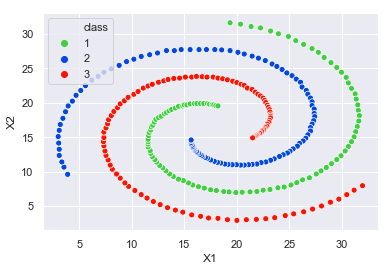

In [249]:
sns.scatterplot(x="X1", y="X2", hue="class", palette=['#40CF40','#0246E3','#FF1300'], data=spiral)

## K-means Clustering

K-means clustering is a type of unsupervised learning used on unlabeled data. The algorithm finds gorups in the data, represented by K, and then iteratively assigns each data point to one of K groups based on the features provided. Data points are clustered based on feature similarity. 

K-means clustering results in centroids of the K cluster, which can be used to label new data, and labels for the training data. Each centroid of a cluster is a collection of feature values which define the resulting groups. 

#### Implementation of K-means clustering algorithm 

In [254]:
from sklearn.metrics import pairwise_distances

class Kmean:    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        self.labels = labels
              
    
    def initialize_centroids(self, data):
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def predict(self, data):
        return self.assign_clusters(data)
    
    
    def fit_kmeans(self, data):
        self.centroids = self.initialize_centroids(data)
        
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)  
        
        # Calculate the sum of squared errors 
        self.inertia = sum(((self.centroids[l] - x)**2).sum()
                            for x, l in zip(X, self.cluster_labels))
        return self 

In [255]:
X = spiral.values

In [256]:
km = Kmean(3, 1, 100)
km.fit_kmeans(X)
y_km = km.predict(X)

km_labels = km.labels

In [257]:
RI = adjusted_rand_score(km_labels, y_km)
                         
print("Rand-Index: ", RI)
print("Sum of Squared Error: ", km.inertia)

Rand-Index:  0.8272345231530868
Sum of Squared Error:  12520.662080164679


Here, we randomly initialize the 3 centroids. 

This is done by picking K random points as centroids and assigning each input value to the nearest cluster by calculating its distance to each centroid. The new centroid is found by taking the average of all the points assigned to cluster. This is repeated until the clusters remain stable. 

In [258]:
centers = km.centroids
print(centers)

[[22.60979381 23.18298969  2.        ]
 [22.72904762 10.1952381   2.04761905]
 [10.57863636 16.18454545  2.        ]]


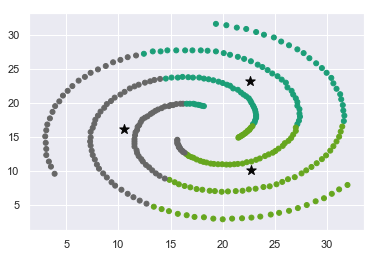

In [259]:
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='#050505', s=100)
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=25, cmap='Dark2')

I am comparing my results from my implementation to the sklearn KMeans module to ensure correctness. 


 [[23.119      22.7565      2.        ]
 [10.3747619  16.86142857  2.        ]
 [21.88878505  9.8453271   2.04672897]]


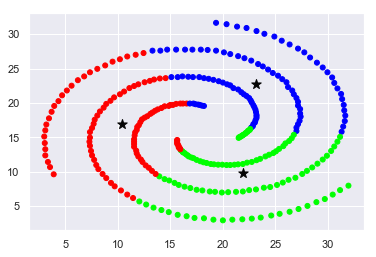

In [260]:
from sklearn.cluster import KMeans

km_test = KMeans(n_clusters = 3, init='random', max_iter=100)
km_test.fit(X)
y_km_test = km_test.predict(X)

# initializing the centroids
k = 3
centroids = km_test.cluster_centers_
print("\n", centroids)

plt.scatter(X[:, 0], X[:, 1], c=y_km_test, s=25, cmap='brg')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#050505', s=100)

#### Compute the intrinsic performance metric. 

The sum of squared errors (SSE) is the sum of squared distances between the given data samples with their corresponding centroids. 

### We will now repeat the K-means clustering algorithm 9 times randomizing the initial centroids.

#### 1st Run 

In [261]:
km1 = Kmean(3, 2, 100)
km1.fit_kmeans(X)
y_km1 = km1.predict(X)

km1_labels = km1.labels

RI1 = adjusted_rand_score(km1_labels, y_km1)

print("\nRand-Index: ", RI1)
print("Sum of Squared Error: ", km1.inertia)

centers1 = km1.centroids
print("\n", centers1)


Rand-Index:  0.8438112938024266
Sum of Squared Error:  12502.12250046753

 [[10.31078431 17.7127451   2.00980392]
 [23.69554455 22.23762376  2.        ]
 [21.08623853  9.60412844  2.03669725]]


#### 2nd run

In [262]:
km2 = Kmean(3, 3, 100)
km2.fit_kmeans(X)
y_km2 = km2.predict(X)

km2_labels = km2.labels

RI2 = adjusted_rand_score(km2_labels, y_km2)

print("\nRand-Index: ", RI2)
print("Sum of Squared Error: ", km2.inertia)

centers2 = km2.centroids
print("\n", centers2)


Rand-Index:  0.8779003408586052
Sum of Squared Error:  12502.238076638028

 [[21.1995614   9.84561404  2.04385965]
 [23.3725     22.5555      1.99      ]
 [10.09540816 17.56734694  2.01020408]]


#### 3rd run

In [263]:
km3 = Kmean(3, 4, 100)
km3.fit_kmeans(X)
y_km3 = km3.predict(X)

km3_labels = km3.labels

RI3 = adjusted_rand_score(km3_labels, y_km3)

print("\nRand-Index: ", RI3)
print("Sum of Squared Error: ", km3.inertia)

centers3 = km3.centroids
print("\n", centers3)


Rand-Index:  0.9061360238755339
Sum of Squared Error:  12499.679354141563

 [[10.57909091 16.58409091  2.        ]
 [22.36904762  9.97857143  2.04761905]
 [22.99896907 22.96443299  2.        ]]


#### 4th run

In [264]:
km4 = Kmean(3, 5, 100)
km4.fit_kmeans(X)
y_km4 = km4.predict(X)

km4_labels = km4.labels

RI4 = adjusted_rand_score(km4_labels, y_km4)

print("\nRand-Index: ", RI4)
print("Sum of Squared Error: ", km4.inertia)

centers4 = km4.centroids
print("\n", centers4)


Rand-Index:  0.7852472376263484
Sum of Squared Error:  12520.11831727087

 [[10.274      18.028       2.01      ]
 [23.86456311 21.96650485  2.        ]
 [20.7146789   9.48807339  2.03669725]]


#### 5th run

In [265]:
km5 = Kmean(3, 7, 100)
km5.fit_kmeans(X)
y_km5 = km5.predict(X)

km5_labels = km5.labels

RI5 = adjusted_rand_score(km5_labels, y_km5)

print("\nRand-Index: ", RI5)
print("Sum of Squared Error: ", km5.inertia)

centers5 = km5.centroids
print("\n", centers5)


Rand-Index:  0.9424536970089652
Sum of Squared Error:  12493.987613155354

 [[23.43838384 22.58232323  2.        ]
 [10.4152381  17.26333333  2.        ]
 [21.56805556  9.7337963   2.0462963 ]]


#### 6th run

In [266]:
km6 = Kmean(3, 8, 100)
km6.fit_kmeans(X)
y_km6 = km6.predict(X)

km6_labels = km6.labels

RI6 = adjusted_rand_score(km6_labels, y_km6)

print("\nRand-Index: ", RI6)
print("Sum of Squared Error: ", km6.inertia)

centers6 = km6.centroids
print("\n", centers6)


Rand-Index:  0.777008042518836
Sum of Squared Error:  12520.981677895461

 [[23.86456311 21.96650485  2.        ]
 [10.21969697 18.06818182  2.01010101]
 [20.66863636  9.52954545  2.03636364]]


#### 7th run

In [267]:
km7 = Kmean(3, 9, 100)
km7.fit_kmeans(X)
y_km7 = km7.predict(X)

km7_labels = km7.labels

RI7 = adjusted_rand_score(km7_labels, y_km7)

print("\nRand-Index: ", RI7)
print("Sum of Squared Error: ", km7.inertia)

centers7 = km7.centroids
print("\n", centers7)


Rand-Index:  0.9345678908116023
Sum of Squared Error:  12497.00374099857

 [[22.99896907 22.96443299  2.        ]
 [22.1587963   9.99212963  2.05555556]
 [10.46074766 16.75560748  1.99065421]]


#### 8th run

In [268]:
km8 = Kmean(3, 11, 100)
km8.fit_kmeans(X)
y_km8 = km8.predict(X)

km8_labels = km8.labels

RI8 = adjusted_rand_score(km8_labels, y_km8)

print("\nRand-Index: ", RI8)
print("Sum of Squared Error: ", km8.inertia)

centers8 = km8.centroids
print("\n", centers8)


Rand-Index:  0.9047717415763021
Sum of Squared Error:  12502.703599933926

 [[10.22227723 17.10891089  2.        ]
 [21.6699115   9.9840708   2.05309735]
 [23.08367347 22.89132653  1.98979592]]


#### 9th run

In [269]:
km9 = Kmean(3, 12, 100)
km9.fit_kmeans(X)
y_km9 = km9.predict(X)

km9_labels = km9.labels

RI9 = adjusted_rand_score(km9_labels, y_km9)

print("\nRand-Index: ", RI9)
print("Sum of Squared Error: ", km9.inertia)

centers9 = km9.centroids
print("\n", centers9)


Rand-Index:  0.8779003408586052
Sum of Squared Error:  12502.238076638028

 [[23.3725     22.5555      1.99      ]
 [10.09540816 17.56734694  2.01020408]
 [21.1995614   9.84561404  2.04385965]]


#### Here I compare the Rand-Index and Sum of Squared Errors for each of the 10 runs.

As seen from the results, the best Rand-Index score and Sum of Squared Error score was achieved by the 5th run.

In [270]:
Score = pd.DataFrame({
    'Run': ['Initial Run', '1st Run', '2nd Run', '3rd Run', '4th Run', '5th Run', 
              '6th Run', '7th Run', '8th Run', '9th Run'],
    'RI_Score': [RI, RI1, RI2, RI3, RI4, RI5, RI6, RI7, RI8, RI9], 
    'SSE_Score': [km.inertia, km1.inertia, km2.inertia, km3.inertia, km4.inertia, 
                  km5.inertia, km6.inertia, km7.inertia, km8.inertia, km9.inertia]})

In [271]:
Score

,Run,RI_Score,SSE_Score
0,Initial Run,0.827235,12520.662080
1,1st Run,0.843811,12502.122500
2,2nd Run,0.877900,12502.238077
3,3rd Run,0.906136,12499.679354
4,4th Run,0.785247,12520.118317
5,5th Run,0.942454,12493.987613
6,6th Run,0.777008,12520.981678
7,7th Run,0.934568,12497.003741
8,8th Run,0.904772,12502.703600
9,9th Run,0.877900,12502.238077


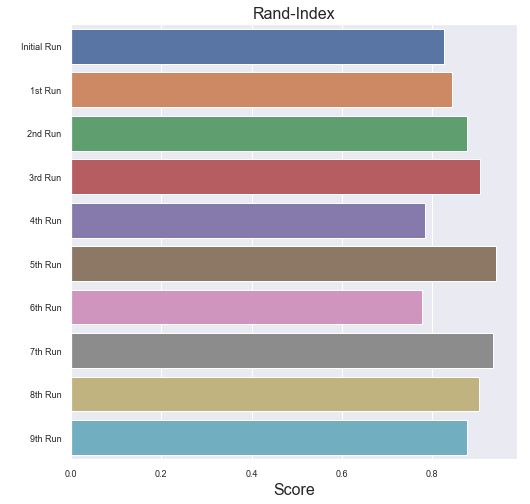

In [273]:
plt.figure(figsize=(8,8))
g = sns.barplot(y=Score['Run'], x = Score['RI_Score'] , orient='h')
g.set_xlabel("Score",fontsize=16)
g.set_ylabel(" ")
g.set_title("Rand-Index", fontsize=16)
g.tick_params(labelsize=9)
plt.show()

#### Clustering results for the 9 runs as well as the initial run. 

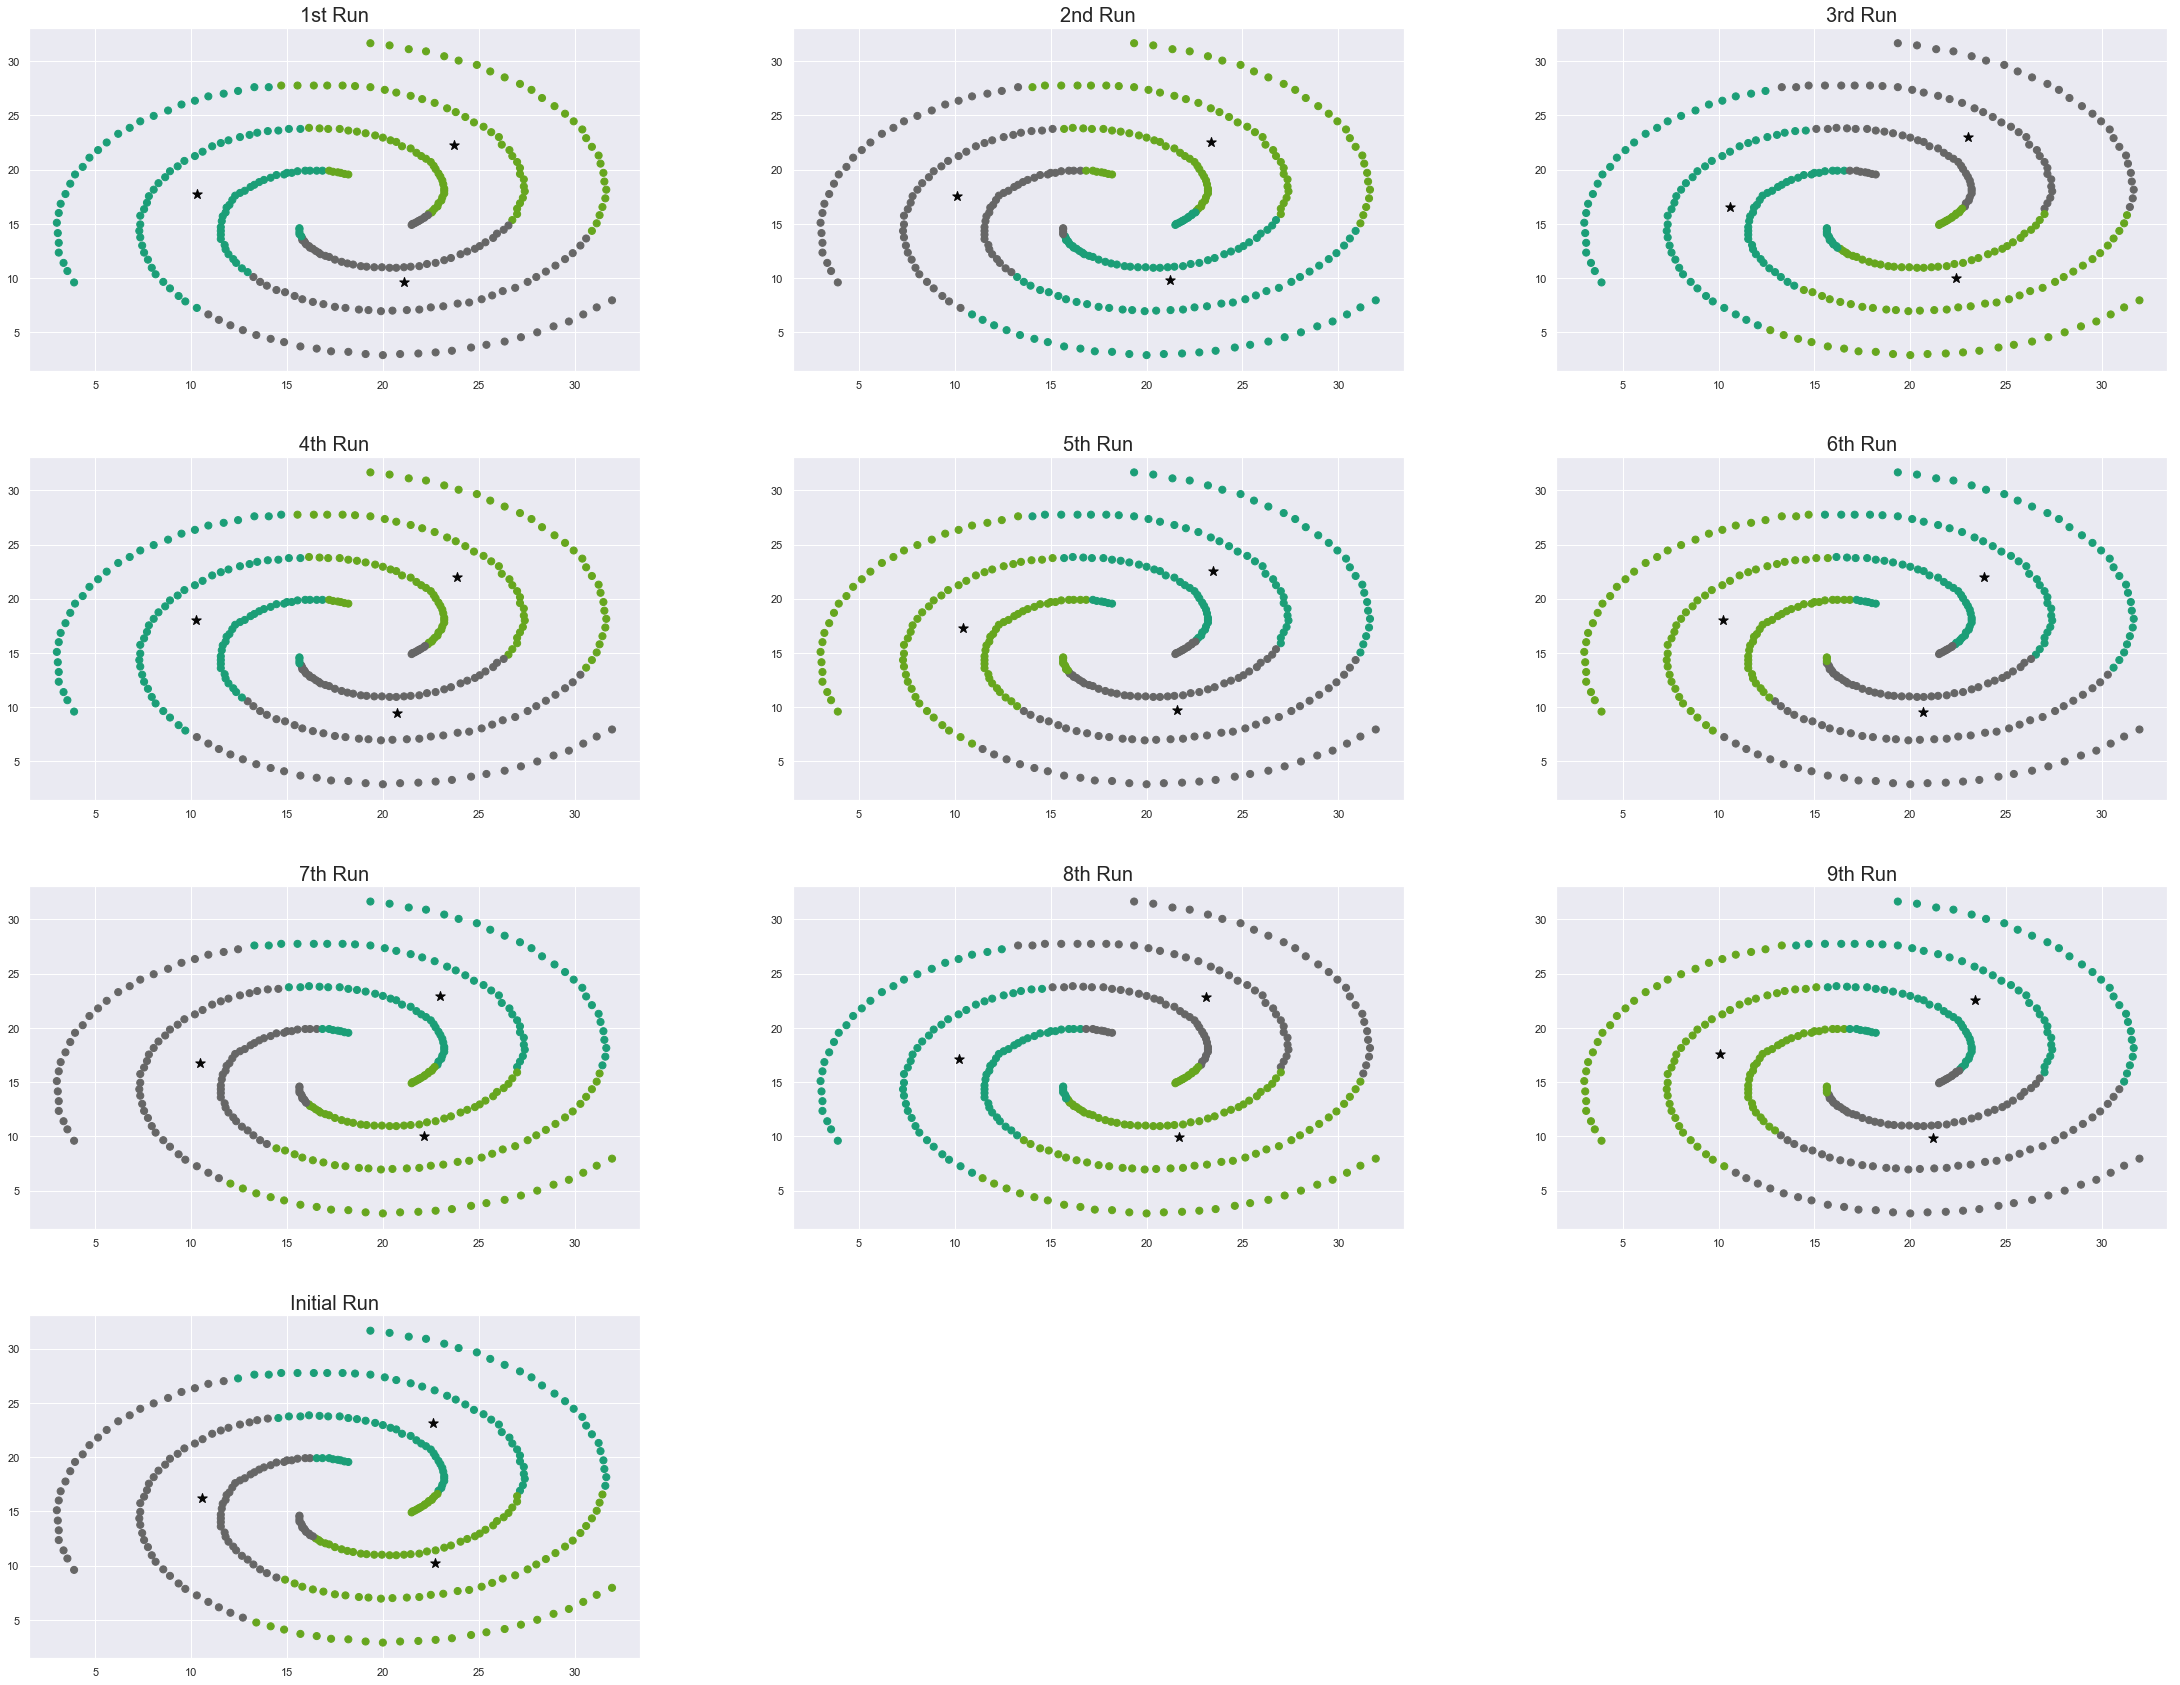

In [245]:
def make_plot(axs):
    
    ax1 = axs[0, 0]
    ax1.set_title('1st Run', fontsize = 20)
    ax1.scatter(X[:, 0], X[:, 1], c=y_km1, s=50, cmap='Dark2')
    ax1.scatter(centers1[:, 0], centers1[:, 1], marker='*', c='#050505', s=100)
    
    ax2 = axs[0, 1]
    ax2.set_title('2nd Run', fontsize = 20)
    ax2.scatter(X[:, 0], X[:, 1], c=y_km2, s=50, cmap='Dark2')
    ax2.scatter(centers2[:, 0], centers2[:, 1], marker='*', c='#050505', s=100)
    
    ax3 = axs[0, 2]
    ax3.set_title('3rd Run', fontsize = 20)
    ax3.scatter(X[:, 0], X[:, 1], c=y_km3, s=50, cmap='Dark2')
    ax3.scatter(centers3[:, 0], centers3[:, 1], marker='*', c='#050505', s=100)
    
    ax4 = axs[1, 0]
    ax4.set_title('4th Run', fontsize = 20)
    ax4.scatter(X[:, 0], X[:, 1], c=y_km4, s=50, cmap='Dark2')
    ax4.scatter(centers4[:, 0], centers4[:, 1], marker='*', c='#050505', s=100)
    
    ax5 = axs[1, 1]
    ax5.set_title('5th Run', fontsize = 20)
    ax5.scatter(X[:, 0], X[:, 1], c=y_km5, s=50, cmap='Dark2')
    ax5.scatter(centers5[:, 0], centers5[:, 1], marker='*', c='#050505', s=100)
    
    ax6 = axs[1, 2]
    ax6.set_title('6th Run', fontsize = 20)
    ax6.scatter(X[:, 0], X[:, 1], c=y_km6, s=50, cmap='Dark2')
    ax6.scatter(centers6[:, 0], centers6[:, 1], marker='*', c='#050505', s=100)
    
    ax7 = axs[2, 0]
    ax7.set_title('7th Run', fontsize = 20)
    ax7.scatter(X[:, 0], X[:, 1], c=y_km7, s=50, cmap='Dark2')
    ax7.scatter(centers7[:, 0], centers7[:, 1], marker='*', c='#050505', s=100)
    
    ax8 = axs[2, 1]
    ax8.set_title('8th Run', fontsize = 20)
    ax8.scatter(X[:, 0], X[:, 1], c=y_km8, s=50, cmap='Dark2')
    ax8.scatter(centers8[:, 0], centers8[:, 1], marker='*', c='#050505', s=100)
    
    ax9 = axs[2, 2]
    ax9.set_title('9th Run', fontsize = 20)
    ax9.scatter(X[:, 0], X[:, 1], c=y_km9, s=50, cmap='Dark2')
    ax9.scatter(centers9[:, 0], centers9[:, 1], marker='*', c='#050505', s=100)
    
    ax10 = axs[3, 0]
    ax10.set_title('Initial Run', fontsize = 20)
    ax10.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='Dark2')
    ax10.scatter(centers[:, 0], centers[:, 1], marker='*', c='#050505', s=100)
    
    # hiding the last two plots created
    ax11 = axs[3, 1]
    ax11.set_visible(False)
    ax12 = axs[3, 2]
    ax12.set_visible(False)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))
fig.subplots_adjust(left=.00, right=.99, hspace=0.25, wspace=0.25)
make_plot(axs)
plt.show()

3D plot to better visualize of where the varying centroids lie.

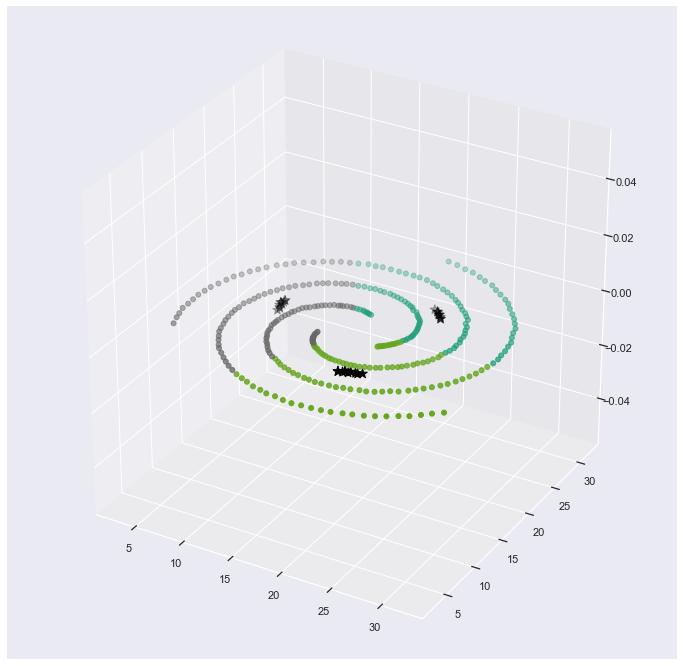

In [244]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], c=y_km, s=25, cmap='Dark2')

ax.scatter(centers[:, 0], centers[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers1[:, 0], centers1[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers2[:, 0], centers2[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers3[:, 0], centers3[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers4[:, 0], centers4[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers5[:, 0], centers5[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers6[:, 0], centers6[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers7[:, 0], centers7[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers8[:, 0], centers8[:, 1], marker='*', c='#050505', s=100)
ax.scatter(centers9[:, 0], centers9[:, 1], marker='*', c='#050505', s=100)

## Hierarchal Clustering

Hierarchal clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Similar to K-means clustering, it groups together data points with similar characteristics. 

There are two types of Hierarchal clustering: Agglomerative and Divisive. In Agglomerative Hierarchal clustering, data points are clustered using a bottom-up approach starting with individual data points  whereas in Divisive Hierarchal clustering, a top-down approach.

For this assignment, I will focus on Agglomerative clustering. 

In [236]:
def euclidean_distance(A, B):

    A = np.array(A)
    B = np.array(B)

    distance = np.sqrt(((A-B)**2).sum())

    return distance

In [240]:
  def isMember(a, B):
        for b in B:
            if len(a) == len(b):
                countTrue = 0
                for i in range(len(a)):
                     if (a[i] == b[i]):
                            countTrue +=1
                if countTrue == len(a):
                    return True
        return False

def linkage_distance(cluster_A, cluster_B, linkage, distance_function=euclidean_distance):

        dist = []
        for i in range(len(cluster_A)):
            dist.append([])
            for j in range(len(cluster_B)):
                dist[i].append(distance_function(cluster_A[i], cluster_B[j]))

        if linkage == 'single':
            return min(min(dist))

        elif linkage == 'complete':
            return max(max(dist))

        elif linkage == 'average':
            x = [sum(a) for a in dist]
            return min(x) / len(cluster_A)
        
        # elid linkage == 'centroid': 


#### Implementation of Agglomerative Hierarchal clustering algorithm 

In [241]:
class Agglomerative():

    def __init__(self, n_clusters=3, affinity=linkage_distance, linkage='average'):
        self.n_clusters = n_clusters
        self.affinity = affinity
        self.classifications = []
        self.linkage = linkage
        self.clusters = []
        self.labels = labels

  
    def fit(self, data):
        self.clusters = []
        self.classifications = [0]* len(data)
        
        for i in data:
            self.clusters.append([i])
        
        while len(self.clusters) != self.n_clusters:
            distances = [0] * len(self.clusters)

            for idx_cluster in range(len(self.clusters)): 
                distances[idx_cluster] = [self.affinity(self.clusters[idx_cluster], self.clusters[i], self.linkage) 
                             for i in range(len(self.clusters))]
                
            min_distances = [sorted(distance)[1]for distance in distances]
            
            x = min_distances.index(min(min_distances))
            y = distances[x].index(sorted(distances[x])[1])
                
            
            self.clusters[x] = self.clusters[x] + self.clusters[y]
            del self.clusters[y]
            
        for i in range(len(data)):
            for j in range(len(self.clusters)):
                if isMember(np.array(data[i]), self.clusters[j]) :
                    self.classifications[i] = j
                    
    def fit_predict(self, data) :
        self.fit(data)
        return self.classifications

#### Single Linkage Method

In [242]:
single = Agglomerative(n_clusters=3, linkage='single')
single_pred = single.fit_predict(X)

s_labels = single.labels
print(s_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


In [165]:
print("Rand-Index: ", adjusted_rand_score(s_labels, single_pred)) 

Rand-Index:  -0.00602523697269643


#### Complete Linkage Method

In [163]:
complete = Agglomerative(n_clusters=3, linkage='complete')
complete_pred = complete.fit_predict(X)

c_labels = complete.labels
print(complete_pred)

[2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [166]:
print("Rand-Index: ", adjusted_rand_score(c_labels, complete_pred)) 

Rand-Index:  0.33827144207242554


#### Average Linkage Method

In [154]:
avg = Agglomerative(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(X)

a_labels = avg.labels
print(a_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


In [167]:
print("Rand-Index: ", adjusted_rand_score(a_labels, avg_pred)) 

Rand-Index:  0.00013465737935166713


#### Centroid Linkage Method

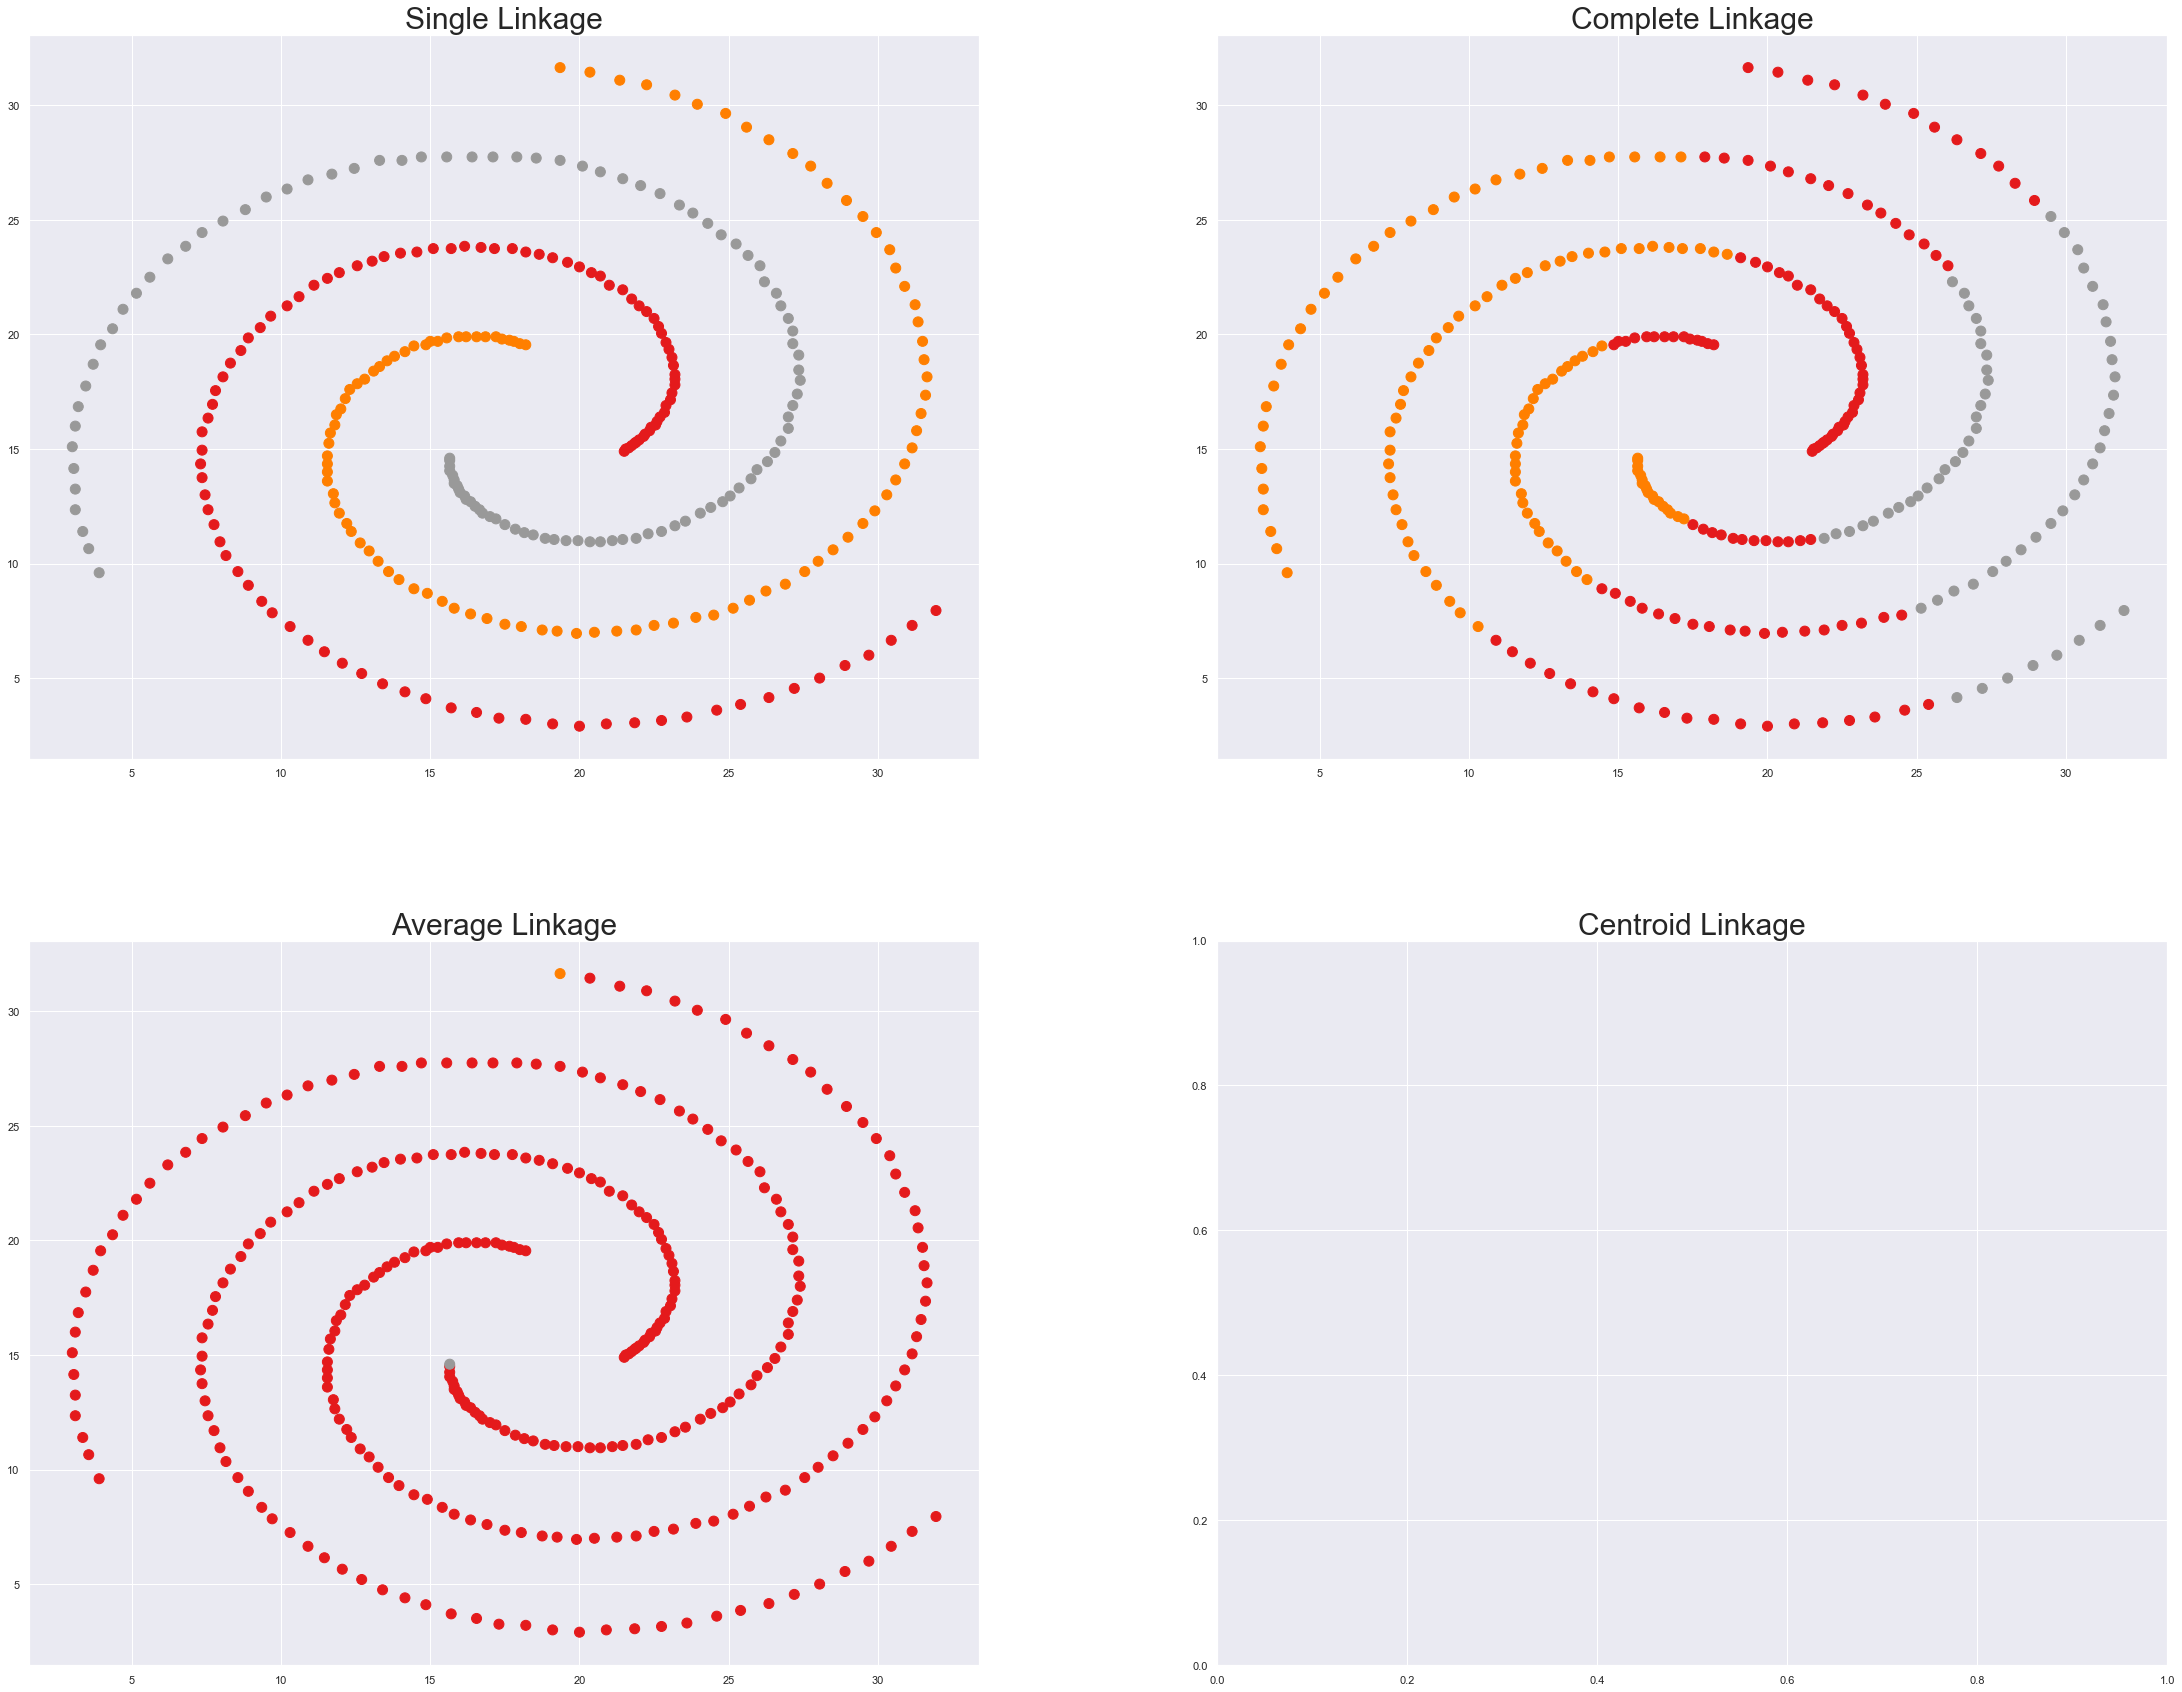

In [160]:
def make_plot2(axs):
    
    ax1 = axs[0, 0]
    ax1.set_title('Single Linkage', fontsize=30)
    ax1.scatter(X[:,0], X[:,1], c = single_pred, cmap='Set1', s = 100)
    
    ax2 = axs[0, 1]
    ax2.set_title('Complete Linkage', fontsize=30)
    ax2.scatter(X[:,0], X[:,1], c = complete_pred, cmap='Set1', s = 100)  
    
    ax3 = axs[1, 0]
    ax3.set_title('Average Linkage', fontsize=30)
    ax3.scatter(X[:,0],X[:,1], c = avg_pred, cmap='Set1', s = 100)

    ax4 = axs[1, 1]
    ax4.set_title('Centroid Linkage', fontsize=30)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))
fig.subplots_adjust(left=.00, right=.99, hspace=0.25, wspace=0.25)
make_plot2(axs)
plt.show()

The results from my above implementation are far off from what I expected for complete linkage and average linkage. Due to time contraints, I will be utilizing the SciPy and Sklearn modules to visualize the dendograms and scatterplots for each of the four linkage methods. 

Of the ones I implemented, the complete likage method gives me the best results for Rand-Index.


Rand-Index:  1.0


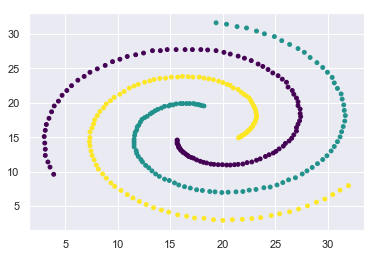

In [230]:
from sklearn.cluster import AgglomerativeClustering

single_test = AgglomerativeClustering(n_clusters=3, linkage='single')
single_test.fit_predict(X)  
single_labels = single_test.labels_

single_RI = adjusted_rand_score(single_labels, single_test.fit_predict(X))
print("\nRand-Index: ", single_RI)

plt.scatter(X[:,0], X[:,1], c=single_test.fit_predict(X), cmap='viridis', s = 15)  

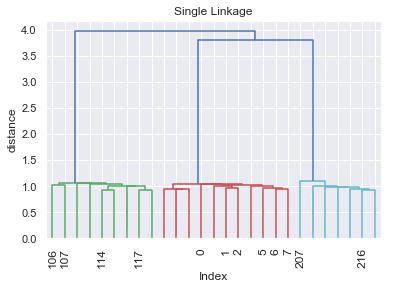

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage

S = linkage(X, 'single')

plt.title('Single Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    S,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=27,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)


plt.show()


Rand-Index:  1.0


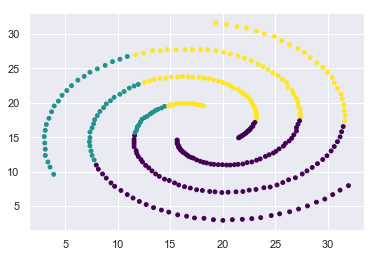

In [231]:
complete_test = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_test.fit_predict(X)  
complete_labels = complete_test.labels_

complete_RI = adjusted_rand_score(complete_labels, complete_test.fit_predict(X))
print("\nRand-Index: ", complete_RI) 

plt.scatter(X[:,0],X[:,1], c=complete_test.fit_predict(X), cmap='viridis', s = 15)  

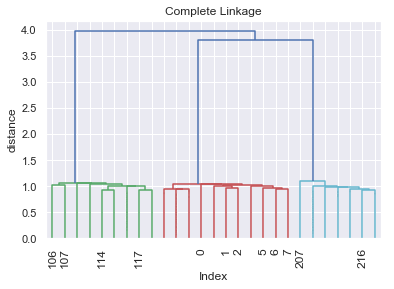

In [209]:
C = linkage(X, 'complete')

plt.title('Complete Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=27,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)


plt.show()


Rand-Index:  1.0


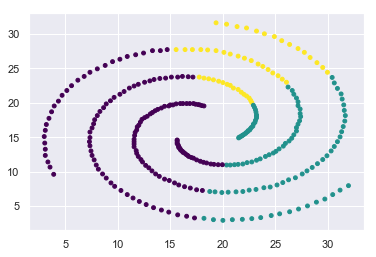

In [234]:
# average linkage 

average_test = AgglomerativeClustering(n_clusters=3, linkage='average')
average_test.fit_predict(X)  
average_labels = average_test.labels_

average_RI = adjusted_rand_score(average_labels, average_test.fit_predict(X))
print("\nRand-Index: ", average_RI) 

plt.scatter(X[:,0],X[:,1], c=average_test.fit_predict(X), cmap='viridis', s = 15)

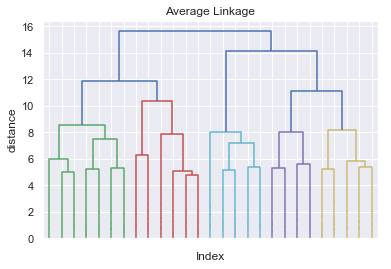

In [211]:
A = linkage(X, 'average')

plt.title('Average Linkage')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(
    A,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=27,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)


plt.show()

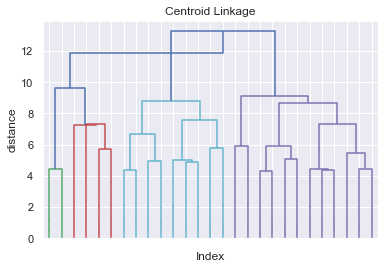

In [216]:
Cen = linkage(X, 'centroid')

plt.title('Centroid Linkage')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(
    Cen,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=27,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)


plt.show()